[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/zanejobe/Mines-ERDS/blob/master/module_1/Module_1_USGS_CoreData.ipynb)

# Module 1: Analyze your first dataset!

Course: GEOL 557 Earth Resource Data Science I: Fundamentals

created by Zane Jobe and Thomas Martin, Colorado School of Mines https://core.mines.edu

## Overview
This notebook will take you through python code very commonly used to import, sort, and visualize some data, in this case a spreadsheet of USGS core data. We will use `pandas`, a fast, powerful, flexible, and easy-to-use data analysis and manipulation tool. 

## Instructions
Since this is our first foray into coding, you will mostly just follow along, but you will interact some with the code to learn! If you get confused or curious about a particular item, you can consult the pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html), but don't worry, we will spend quite a bit of time in Module 2 learning about the power of pandas. 

By completing this notebook, you will be able to:
- See how easy it is to interact with a large dataset that would be cumbersome to handle in Excel. 
- Slice/group/combine data and perform basic data exploration and visualization

### First, let's import some libraries

In [1]:
# these three libraries are very, very, common and you will probably import them almost any time you do anything
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# this sets the notebook width to make use of more screen on a widescreen laptop
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


And with any Colab notebook, you need to give it access to your Google Drive.

Click the link, copy the code, and paste it in the box, and push enter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Read in some data
We will use a csv file that has lists all the cores in the USGS Core Research Center in Lakewood, CO. I just downloaded it directly from the website and made no changes to it. That's the whole point of all this, which is to work with data you can easily obtain and not spend time manually changing things in Excel. 

You don't need to do this, but if you want to recreate this dataset, you can download this exact spreadsheet from the [USGS CRC](https://my.usgs.gov/crcwc/). Just click search, don't type anything into the boxes. You should get 16,531 rows (as of Feb 2020), which you can export as a CSV at the bottom of the page. You could do the same things for cuttings by clicking on the cuttings tab (there are 53,456 rows in the cuttings database), but we will just stick with cores for now - 16,000 rows is plenty of data for our first foray into python!

You will need to change the `folder_path` variable so that it points to the proper folder in your Google Drive where you put the `cores_all.csv` file. 

In [ ]:
# CHANGE THIS TO MATCH YOUR PATH
folder_path = 'gdrive/My Drive/1_PythonCourse/Mines-ERDS/module_1/' 

file_name = 'cores_all.csv' # this shouldn't need to be changed unless you change the file name

df=pd.read_csv(folder_path + file_name) # uses pandas to read in the csv as a 'DataFrame' called df
pd.set_option('display.max_columns', None) # allows you to scroll horizontally when you look at the dataframe 
df.head() # display the first five rows of the dataframe; to look at the last five rows, use tail

,Twn Num,Twn Dir,Rng Num,Rng Dir,Sec,Quarter,Lib Num,API Num,Operator,Well Name,Field,Type,State,County,Photos,Thin Sec,Analysis,Latitude,Longitude,Source,Security Flag,Formation,Age,Min Depth,Max Depth
0,21.0,S,8.0,E,17.0,SWSW,T645,4.301530e+09,WOLF ENERGY,1-17 ANDOVER FED,WILDCAT,FULL,UT,EMERY,F,F,F,38.985290,-111.053300,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,KAIBAB /LM/,PERM,5147.0,5207.0
1,157.0,N,91.0,W,7.0,SWNW,T646,3.306100e+09,GARY SAMUEL JR,7-5 JOHNSON,WILDCAT,SLABBED,ND,MOUNTRAIL,F,F,T,48.439313,-102.492039,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,RIVAL,MISS,8047.0,8108.0
2,6.0,S,94.0,W,34.0,SESWNW,T649,5.045600e+08,CER CORPORATION,MWX-2 SUPERIOR,RULISON,THIN SLAB,CO,GARFIELD,T,T,T,39.483180,-107.880799,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,MESAVERDE,CRET,4870.0,4956.0
3,6.0,S,94.0,W,34.0,SESWNW,T649,5.045600e+08,CER CORPORATION,MWX-2 SUPERIOR,RULISON,THIN SLAB,CO,GARFIELD,T,T,T,39.483180,-107.880799,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,MESAVERDE,CRET,5485.0,5500.0
4,6.0,S,94.0,W,34.0,SESWNW,T649,5.045600e+08,CER CORPORATION,MWX-2 SUPERIOR,RULISON,THIN SLAB,CO,GARFIELD,T,T,T,39.483180,-107.880799,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,MESAVERDE,CRET,5551.0,5581.0


### Now let's create a thickness value from the Depth columns to see how thick each core sample is:

In [ ]:
th=df['Max Depth']-df['Min Depth'] # make the variable
df['thickness']=th # assign it to a new column in dataframe called thickness

In [ ]:
df.thickness.describe()

count    16485.000000
mean       126.122354
std        523.089766
min      -6152.000000
25%         20.000000
50%         41.000000
75%         65.000000
max      16253.000000
Name: thickness, dtype: float64

A median of 41 feet seems ok, but the mean is 126, so the distribution is extremely log-normal. Notice the max and min are obviously errors in the database. We won't worry about that for now, as we want to check out the bulk statistics of the database. But good to know there may be a few weird values that you would want to filter out. 

Also, note that there are a few thickness values missing, as the dataframe is 16531 rows and the thickness only has 16485 rows (meaning some rows don't have depth values).

## Now let's subset the dataframe to look at only Colorado and Wyoming cores

In [ ]:
cowy=df[df['State'].isin(['CO','WY'])] # it's as easy at that!! 

# Now let's view the numer of cores grouped by Formation and State
tmp=cowy.groupby(['Formation','State']).size()
tmp=tmp.sort_values(ascending=False) # sort the values in descending order (i.e., with the largest values at the top)
print(tmp[0:50]) # only show the top 50 values

Formation      State
MINNELUSA      WY       507
PHOSPHORIA     WY       451
MUDDY          WY       444
DAKOTA         WY       437
FRONTIER       WY       396
GREEN RIVER    CO       355
TENSLEEP       WY       352
UNKNOWN        CO       321
               WY       317
DAKOTA J       CO       302
TEAPOT         WY       201
ALMOND         WY       195
MESAVERDE      WY       176
DAKOTA D       CO       159
PARKMAN        WY       144
DAKOTA         CO       127
GREEN RIVER    WY       118
SHANNON        WY       115
NIOBRARA       CO       104
MESAVERDE      CO       104
FORT UNION     WY       103
SUSSEX         CO       102
LEWIS          WY        97
MOWRY          WY        84
WASATCH        WY        81
WALL CREEK     WY        69
OPECHE         WY        66
FRUITLAND      CO        62
WILLIAMS FORK  CO        61
MADISON        WY        60
LANCE          WY        59
MANCOS         CO        55
SKULL CREEK    WY        53
LYONS          CO        51
SUSSEX         WY        51

## Now you try a groupby of some of the other columns:
Maybe By `Age` and `Formation`? Or `State` and `County`? Choose any of the column names, but consider whether they are useful for grouping. For example, depth probably isn't useful here, as each core will have a slightly different depth values, so you would end up with thoussands of groups. 

In [ ]:
# do stuff here
tmp=df.groupby(['Age','Formation']).size()
tmp[0:20]

Age       Formation      
602       MUDDY               2
CAMB      ARBUCKLE            7
          BONNETERRE          1
          CAMBRIAN           11
          DAVIS               1
          DEADWOOD            4
          EMERSON             2
          EMINENCE /DOLO/     1
          FLATHEAD            9
          GROS VENTRE         3
          OPEN DOOR           2
          REAGAN              3
          UNKNOWN             2
CAMBRIAN  CAMBRIAN MIDDLE    16
          FLATHEAD            3
          GROS VENTRE         1
CAMP      CAMBRIAN            1
CRCS      SHANNON             1
CRE       FRONTIER            1
          PARKMAN             1
dtype: int64

### Now let's subset a little more to look at one formation only

In [ ]:
Fm_of_interest=cowy.loc[cowy['Formation']=='GREEN RIVER'] # pull only one formation
print('there are',len(Fm_of_interest),'green river cores')

slab=Fm_of_interest[Fm_of_interest['Type'].isin(['SLABBED'])] # find only slabbed cores (i.e., not whole core or butts)
print('there are',len(Fm_of_interest),'slabbed green river cores') 

there are 473 green river cores
there are 225 slabbed green river cores


### Let's look at a CDF to see the thickness values
Either there are a lot of really thick cores here, or the depth values are wrong...

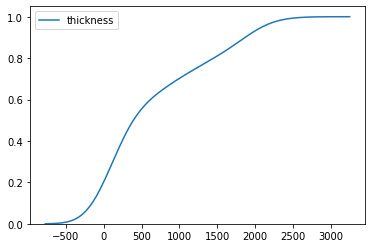

In [ ]:
sns.kdeplot(slab.thickness,cumulative=True)

## Now you try! 
### Make a plot of cores from any formation (or two formations) that you want:

In [ ]:
# do stuff here







# UTILITIES

## Can determine the stats for any county as well:

In [ ]:
countyname='DENVER' # change this name (case sensitive)

c=cutt.loc[cutt['County']==countyname]
print('There are',c.thickness.sum(),'ft of slabbed core in',countyname,'County')
print('There are',c['Well Name'].unique().size,'wells in',countyname,'County')
print('There are',c['Well Name'].size,'slabbed core boxes in',countyname,'County')

NameError: ignored

## Find sample distribution for a particular place

Type
SLABBED                                   1418
FULL                                      1020
THICK SLAB                                  91
FULL - DISCONTINUOUS SEGMENTS               52
SPLIT                                       51
THIN SLAB                                   46
CUTTINGS                                    21
CHIPS                                       15
SPLIT - DISCONTINUOUS SEGMENTS              10
FULL & SPLIT                                 7
FULL DISCONTINUOUS SEGMENTS & CUTTINGS       6
FULL & SPLIT-DISCONTINUOUS SEGMENTS          5
THIN - DISCONTINUOUS SEGMENTS                5
FULL & CUTTINGS                              3
DISCONTINUOUS SEGMENTS                       2
CRUSHED SAMPLES                              2
UNKNOWN                                      2
dtype: int64


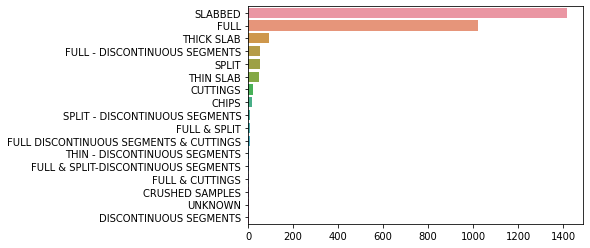

In [ ]:
tmp=df.loc[df['State']=='CO']
print(tmp.groupby('Type').size().sort_values(ascending=False))
counts=tmp['Type'].value_counts()
sns.barplot(y=counts.index, x=counts.values)
plt.show()

## find formations with most rows of data

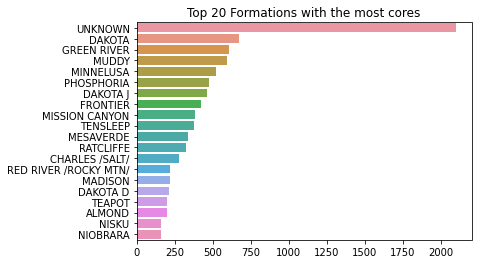

In [ ]:
counts=df['Formation'].value_counts()
sns.barplot(y=counts.index[0:20], x=counts.values[0:20])
plt.title('Top 20 Formations with the most cores')
plt.show()

## find well names in Wyoming with most rows of data

In [ ]:
wy=df[df['State'].isin(['WY'])]
tmp=wy.groupby(['Well Name','Formation']).size()
tmp=tmp.sort_values(ascending=False)
tmp[0:25]

Well Name                Formation  
1 WILLIAMS               WASATCH        53
UNIT UPRR5               DAKOTA         14
F-21-2-P KRAUSE          MINNELUSA      14
AZURITE STATE 16-08 CBM  ALMOND COAL    12
72 LOST SOLDIER UNIT     TENSLEEP       10
1 BYRON UNION            FRONTIER       10
1 BOSTON GOVERNMENT      NIOBRARA        9
11-25 RAIRDEN ESTATE     PHOSPHORIA      9
1 MADISON TEST WELL      MADISON         9
20 UNIT                  DAKOTA          8
C-47  TIP TOP SHALLOW    MESAVERDE       8
1 BOSTON GOVERNMENT      FRONTIER        8
1W LOST SOLDIER A        FRONTIER        7
2 CASTER FEDERAL         PHOSPHORIA      7
16 DESERT SPRINGS UNIT   LEWIS           7
1 ADAM PRYDE             UNKNOWN         7
1 CHAMPLIN 450 AMOCO A   ALMOND          7
1 MESA UNIT              LANCE           6
A-10 GOVERNMENT          TENSLEEP        6
1 WAGON WHEEL            FORT UNION      6
A-1 WASP                 MESAVERDE       6
1-35 DOLLIS              LANCE           6
2 MERNA          

## take the most common well name, and export the data as a csv

In [ ]:
one_well=df.loc[df['Well Name']=='1 WILLIAMS'] # choose a well name called "1 WILLIAMS" (case sensitive)
one_well.to_csv('one_well_export.csv') # export just that one well

## find total thickness of Lewis cores in Wyoming

In [ ]:
wy=df[df['State'].isin(['WY'])]
lewis=wy[wy['Formation'].isin(['LEWIS'])].sort_values(by='thickness',ascending=False)
lewis.thickness.suum()

,Twn Num,Twn Dir,Rng Num,Rng Dir,Sec,Quarter,Lib Num,API Num,Operator,Well Name,Field,Type,State,County,Photos,Thin Sec,Analysis,Latitude,Longitude,Source,Security Flag,Formation,Age,Min Depth,Max Depth,thickness
10784,16.0,N,92.0,W,25.0,NWNENW,E997,NaN,CO SCHOOL OF MINES,STRAT TEST #61,LEWIS OUTCROP,SLABBED,WY,CARBON,T,T,T,41.33487,-107.69920,CENTER OF QUARTER SECTION,NO SPECIAL RESTRICTIONS,LEWIS,CRET,150.0,602.0,452.0
10330,20.0,N,95.0,W,21.0,C SE,B291,4.903721e+09,AMOCO PRODUCTION,441 CHAMPLIN AMOCO A,WAMSUTTER,SLABBED,WY,SWEETWATER,T,T,T,41.69160,-108.10710,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,9086.0,9223.0,137.0
1247,21.0,N,98.0,W,13.0,SWNE,B307,4.903706e+09,UNION PACIFIC RR,16 DESERT SPRINGS UNIT,DESERT SPRINGS,SLABBED,WY,SWEETWATER,T,T,T,41.79505,-108.44047,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,5660.0,5791.0,131.0
7266,21.0,N,97.0,W,19.0,SWNE,B306,4.903706e+09,UNION PACIFIC RR,19 DESERT SPRINGS UNIT,DESERT SPRINGS,SLABBED,WY,SWEETWATER,T,T,T,41.78052,-108.42122,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,5831.0,5950.0,119.0
3523,20.0,N,92.0,W,35.0,SENWSE,D871,4.903721e+09,AMOCO PRODUCTION,1 CHAMPLIN 345 AMOCO A,UNNAMED,SLABBED,WY,SWEETWATER,T,T,T,41.66249,-107.72456,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,8691.0,8809.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,21.0,N,98.0,W,13.0,SWNE,B307,4.903706e+09,UNION PACIFIC RR,16 DESERT SPRINGS UNIT,DESERT SPRINGS,SLABBED,WY,SWEETWATER,T,T,T,41.79505,-108.44047,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,5819.0,5821.0,2.0
7267,21.0,N,98.0,W,13.0,SWNE,B307,4.903706e+09,UNION PACIFIC RR,16 DESERT SPRINGS UNIT,DESERT SPRINGS,SLABBED,WY,SWEETWATER,T,T,T,41.79505,-108.44047,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,5800.0,5801.0,1.0
7268,21.0,N,98.0,W,13.0,SWNE,B307,4.903706e+09,UNION PACIFIC RR,16 DESERT SPRINGS UNIT,DESERT SPRINGS,SLABBED,WY,SWEETWATER,T,T,T,41.79505,-108.44047,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,5803.0,5804.0,1.0
1248,21.0,N,98.0,W,13.0,SWNE,B307,4.903706e+09,UNION PACIFIC RR,16 DESERT SPRINGS UNIT,DESERT SPRINGS,SLABBED,WY,SWEETWATER,T,T,T,41.79505,-108.44047,FROM STATE RECORDS,NO SPECIAL RESTRICTIONS,LEWIS,CRET,5810.0,5811.0,1.0


## LOOK AT MUDDY CORES

In [ ]:
wy=df[df['State'].isin(['WY'])]
natrona=wy[wy['County'].isin(['NATRONA'])]
natrona.groupby('Field').size()

Field
AIRPORT AREA             2
BATES CREEK              1
BATES HOLE AREA          1
BOONE DOME               1
BURKE RANCH              1
BURKE RANCH EAST         1
BURNT WAGON              6
CASPER CREEK SOUTH       1
CLEVIDENCE CREEK         2
COLE CREEK              23
COLE CREEK NE            2
EAST BURKE RANCH         1
GEARY DOME               5
GRIEVE                  24
GRIEVE NORTH             4
GRIEVE UNIT              1
GRIEVES                  4
HELLS HALF ACRE         20
JAMESON                  2
LOST DOME                1
MIDDLE FORK              2
MIDWAY                   1
NORTH GEARY              1
NORTH GRIEVE             4
NORTH GRIEVE PROJECT     1
NORTH GRIEVE UNIT        1
NOTCHES                  2
OIL MOUNTAIN             1
OKIE                     3
PINE MOUNTAIN            1
POISON SPIDER           50
POISON SPIDER W          6
RADERVILLE               1
S CASPER CREEK           1
SADDLE ROCK              2
SAGE SPRING CREEK       44
SALT CREEK            

## Let's make a nice map
This look a bit complicated, and you don't have to understand everything that is in this cell. However, realize that making a very informative map like the one below only requires this much code, and all you would have to do is change the formation name  that creates the dataset called `Fm_of_interest`, and you could generate this plot for every formation that is in the USGS database! 

In [ ]:
!pip install folium
import folium 

def df_to_geojson(df, properties, lat='Latitude', lon='Longitude'):
    """
    from https://github.com/gboeing/urban-data-science/blob/master/17-Leaflet-Web-Mapping/leaflet-simple-demo/pandas-to-geojson.ipynb
    
    Turn a dataframe containing point data into a geojson formatted python dictionary
    
    df : the dataframe to convert to geojson
    properties : a list of columns in the dataframe to turn into geojson feature properties
    lat : the name of the column in the dataframe that contains latitude data
    lon : the name of the column in the dataframe that contains longitude data
    """
    
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}

        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

############

Fm_of_interest=df[df['Formation'].isin(['NIOBRARA'])]
useful_columns = ['Well Name', 'Min Depth']
Fm_of_interest_geojson_dict = df_to_geojson(Fm_of_interest, properties=useful_columns)

############

m = folium.Map(
    location=[42, -105],
    tiles='Stamen Terrain',
    zoom_start=5
)

folium.GeoJson(
    Fm_of_interest_geojson_dict,
    name='geojson'
).add_to(m)

folium.LayerControl().add_to(m)

m